#### In this notebook, we provide an exemplary use of the BiGRU denoiser. 
#### Following the demonstrated 4 steps, anyone can use it to remove noise from an ECG signal

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools.use_denoiser as d
import tools.compute_metrics_no_GT as cm
import tools.use_AE_db as ae

#### Step 1 - Load a noisy signal (example from the factory environment)

In [2]:
ecg_sig_pd = pd.read_csv('example_factory.txt', header=None)
ecg_sig_np = np.array(ecg_sig_pd[0], dtype='int64')
fs_ori = 350 # sampling frequency of the data

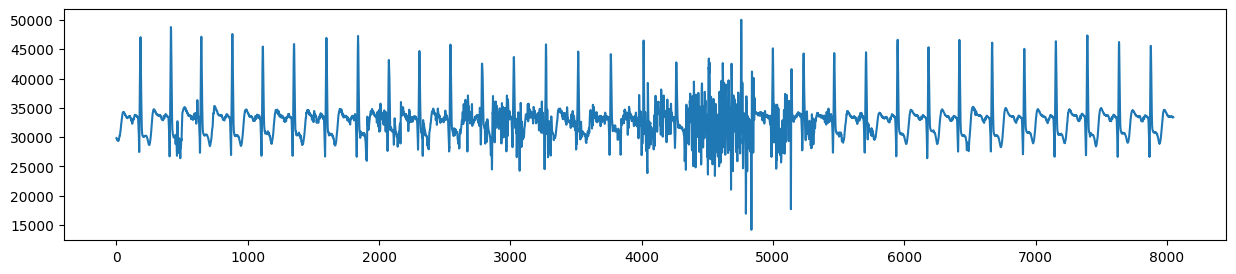

In [3]:
i=134
f=157
plt.figure(figsize=[15,3])
plt.plot(ecg_sig_np[i*fs_ori:f*fs_ori])

#### Step 2 - Prepare the signal to be used by the model
##### (using the provided function "prepare_ecg")

In [4]:
ecg_sig = d.prepare_ecg(ecg_sig_np, fs_ori) # re-sampling to 360 Hz and min-max normalization, reshape to 3D torch tensor

#### Step 3 - Import the model (architecture and trained weights)
##### (using the provided function "import_model")

In [5]:
model = d.import_model()

#### Step 4 - Remove the noise
##### (using the provided function "clean_ecg_segments")

In [6]:
clean_sig_, time = d.clean_ecg_segments(ecg_sig, model, postalign=True, figures=False)
print('Time: ' + str(time))

clean_sig = clean_sig_.flatten()

Time: 57.60153603553772


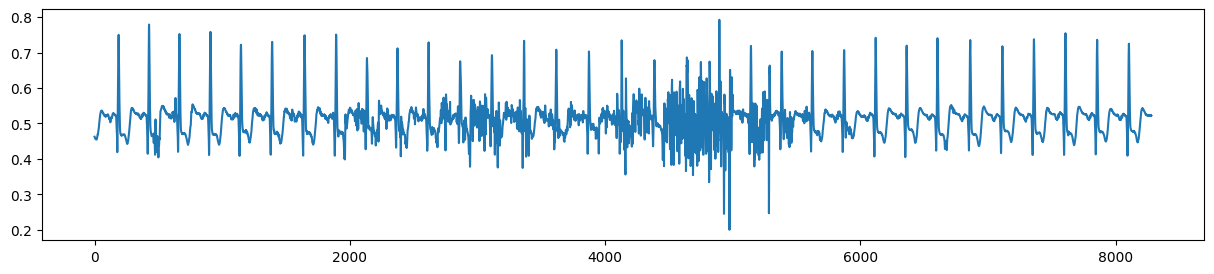

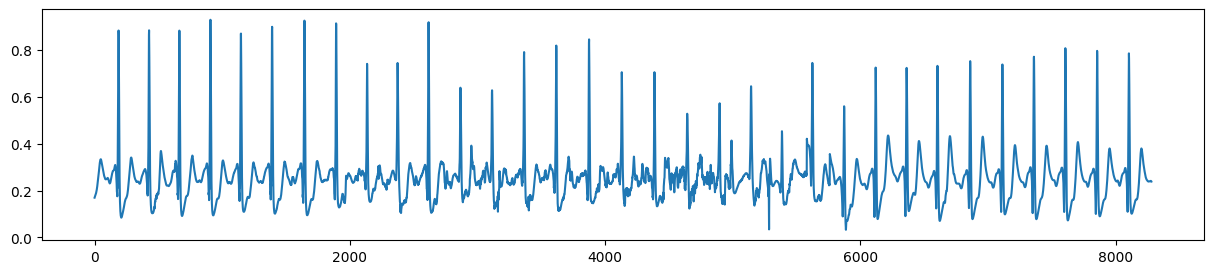

In [7]:
i=134
f=157
fs = 360
before_sig = ecg_sig.flatten()
plt.figure(figsize=[15,3])
plt.plot(before_sig[i*fs:f*fs])
plt.figure(figsize=[15,3])
plt.plot(clean_sig[i*fs:f*fs])

#### Compare R-peak detection: before vs after

In [13]:
# before cleaning
up_lim, low_lim = cm.outliers_limits(b_sig)
peaks_ind_bef, rr_dist_bef, [out_up_bef, out_low_bef] = cm.rr_outliers(b_sig, up_lim, low_lim, plots=False)
miss_bef = cm.missing_peaks(rr_dist_bef, out_up_bef)
wron_bef = cm.wrong_detection(out_low_bef)
print('Before: ' + str(miss_bef) + ' missing and ' + str(wron_bef) + ' wrongly detected')

# after cleaning
peaks_ind_aft, rr_dist_aft, [out_up_aft, out_low_aft] = cm.rr_outliers(c_sig, up_lim, low_lim, plots=False)
miss_aft = cm.missing_peaks(rr_dist_aft, out_up_aft)
wron_aft = cm.wrong_detection(out_low_aft)
print('After: ' + str(miss_aft) + ' missing and ' + str(wron_aft) + ' wrongly detected')

rr_bpm_bef = cm.samples_to_bpm(rr_dist_bef)
rr_bpm_aft = cm.samples_to_bpm(rr_dist_aft)

Before: 3 missing and 3 wrongly detected
After: 1 missing and 1 wrongly detected


In [19]:
orange = '#EFB480'
green = '#92C9AC'
blue = '#4BA3C3'
grey = '#9FA0A8'
black = '#201E1D'
plt.rcParams["font.family"] = "Arial"
title_size = 18
axes_lab_size = 12
legend_size = 14

Text(0.5, 0, 'Samples')

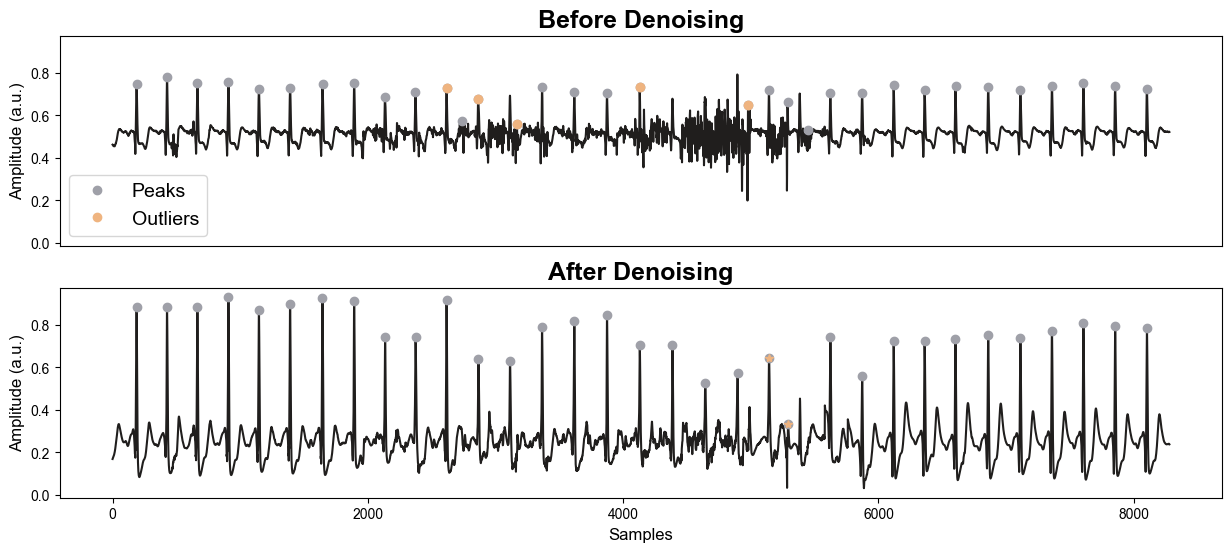

In [20]:
plt.figure(figsize=[15,6])
ax1 = plt.subplot(2, 1, 1)
ax1.plot(b_sig, c=black)
ax1.plot(peaks_ind_bef, b_sig[peaks_ind_bef], 'o', c=grey, label='Peaks')
ax1.plot(peaks_ind_bef[out_up_bef], b_sig[peaks_ind_bef[out_up_bef]], 'o', c=orange, label='Outliers')
ax1.plot(peaks_ind_bef[out_low_bef], b_sig[peaks_ind_bef[out_low_bef]], 'o', c=orange)  # , label='Wrong Detection')
ax1.axes.get_xaxis().set_visible(False)
plt.ylabel('Amplitude (a.u.)', fontsize=axes_lab_size)
plt.title('Before Denoising', fontweight='bold', fontsize=title_size)
ax1.legend(loc='best', fontsize=legend_size)
ax3 = plt.subplot(2, 1, 2, sharex=ax1, sharey=ax1)
ax3.plot(c_sig, c=black)
ax3.plot(peaks_ind_aft, c_sig[peaks_ind_aft], 'o', c=grey)
ax3.plot(peaks_ind_aft[out_up_aft], c_sig[peaks_ind_aft][out_up_aft], '*', c=orange, label='Outlier')
ax3.plot(peaks_ind_aft[out_low_aft], c_sig[peaks_ind_aft][out_low_aft], '*', c=orange)
plt.title('After Denoising', fontweight='bold', fontsize=title_size)
plt.ylabel('Amplitude (a.u.)', fontsize=axes_lab_size)
plt.xlabel('Samples', fontsize=axes_lab_size)